Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/anaconda3/envs/OR/lib/python3.12/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/9f/pv1nlhw528d_5zttzbkb_h5m0000gn/T/2def044f79454a39959d1beb1b07a0a1-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/9f/pv1nlhw528d_5zttzbkb_h5m0000gn/T/2def044f79454a39959d1beb1b07a0a1-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 11 COLUMNS
At line 39 RHS
At line 46 BOUNDS
At line 56 ENDATA
Problem MODEL has 6 rows, 9 columns and 18 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 6 (0) rows, 9 (0) columns and 18 (0) elements
Perturbing problem by 0.001% of 1 - largest nonzero change 9.6816743e-06 ( 0.00096816743%) - largest zero change 0
0  Obj 0 Primal inf 1700 (3) Dual inf 8.9999285 (9)
5  Obj -2299.9838
Optimal - objective value -2300
Optimal objective -2300 - 5 iterations time 0.

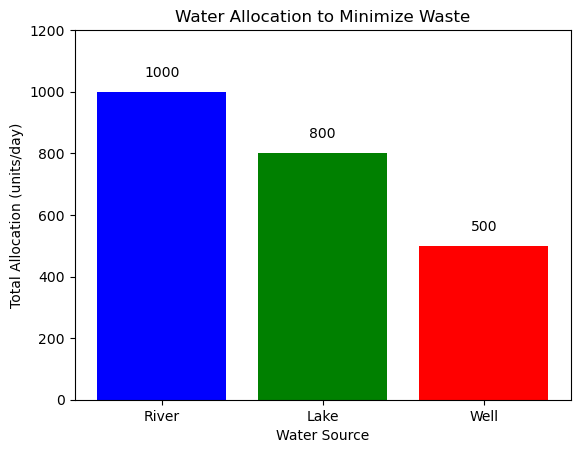

In [1]:
import pulp
import matplotlib.pyplot as plt

# Define the problem
prob = pulp.LpProblem("Water_Minimization", pulp.LpMinimize)

# Variables: allocation from each source to each sector
# Example: river_res is water from river to residential
river_res = pulp.LpVariable("river_res", lowBound=0, upBound=700)
river_ind = pulp.LpVariable("river_ind", lowBound=0, upBound=600)
river_agr = pulp.LpVariable("river_agr", lowBound=0, upBound=400)

lake_res = pulp.LpVariable("lake_res", lowBound=0, upBound=700)
lake_ind = pulp.LpVariable("lake_ind", lowBound=0, upBound=600)
lake_agr = pulp.LpVariable("lake_agr", lowBound=0, upBound=400)

well_res = pulp.LpVariable("well_res", lowBound=0, upBound=700)
well_ind = pulp.LpVariable("well_ind", lowBound=0, upBound=600)
well_agr = pulp.LpVariable("well_agr", lowBound=0, upBound=400)

# Objective: Minimize the unused water from each source
prob += (1000 - (river_res + river_ind + river_agr) + 
         800 - (lake_res + lake_ind + lake_agr) + 
         500 - (well_res + well_ind + well_agr), "Minimize_Waste")

# Demand satisfaction constraints
prob += (river_res + lake_res + well_res >= 700, "Residential_Demand")
prob += (river_ind + lake_ind + well_ind >= 600, "Industrial_Demand")
prob += (river_agr + lake_agr + well_agr >= 400, "Agricultural_Demand")

# Source capacity constraints
prob += (river_res + river_ind + river_agr <= 1000, "River_Capacity")
prob += (lake_res + lake_ind + lake_agr <= 800, "Lake_Capacity")
prob += (well_res + well_ind + well_agr <= 500, "Well_Capacity")

# Solve the problem
prob.solve()

# Print results
print("Total Waste:", prob.objective.value())
sources = ["River", "Lake", "Well"]
allocations = [(river_res.value() + river_ind.value() + river_agr.value()),
               (lake_res.value() + lake_ind.value() + lake_agr.value()),
               (well_res.value() + well_ind.value() + well_agr.value())]

# Visualize the results
fig, ax = plt.subplots()
ax.bar(sources, allocations, color=['blue', 'green', 'red'])
ax.set_xlabel("Water Source")
ax.set_ylabel("Total Allocation (units/day)")
ax.set_title("Water Allocation to Minimize Waste")
ax.set_ylim(0, 1200)  # Extend y-axis limit for better visualization
for i, v in enumerate(allocations):
    ax.text(i, v + 50, f"{v:.0f}", color='black', ha='center')
plt.show()
